In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Replace the path below if your CSV is inside a subfolder
file_path = "/content/drive/MyDrive/train.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Display basic info
print("Shape of dataset:", df.shape)
print("\nColumns:")
print(df.columns)

# Show first 5 rows
df.head()


Shape of dataset: (614, 13)

Columns:
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.isnull().sum()



,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
# ✅ Better practice (no chained assignment)
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

# Check remaining missing values after filling
print(df.isnull().sum())


Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64


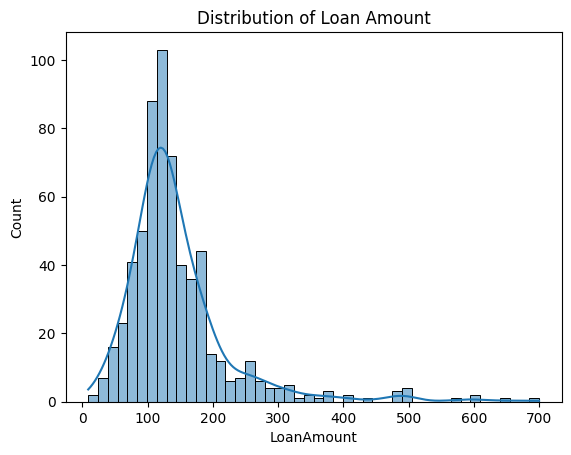

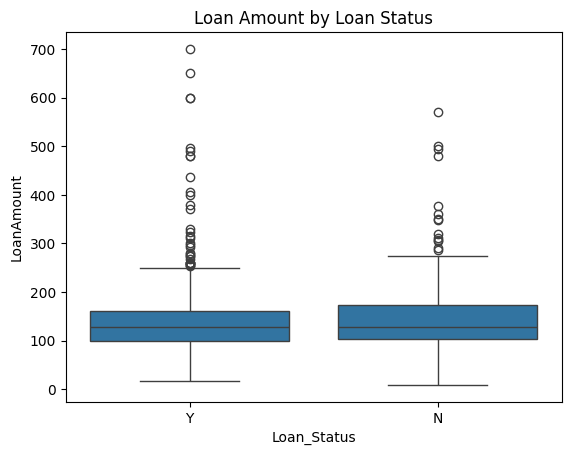

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['LoanAmount'], kde=True)
plt.title('Distribution of Loan Amount')
plt.show()

sns.boxplot(x='Loan_Status', y='LoanAmount', data=df)
plt.title('Loan Amount by Loan Status')
plt.show()


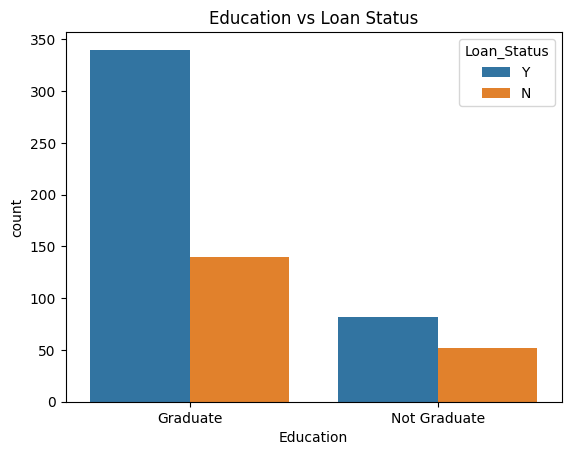

In [ ]:
sns.countplot(x='Education', hue='Loan_Status', data=df)
plt.title('Education vs Loan Status')
plt.show()


🔎 Encoded Data Preview:
    Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0  LP001002       1        0           0          0              0   
1  LP001003       1        1           1          0              0   
2  LP001005       1        1           0          0              1   
3  LP001006       1        1           0          1              0   
4  LP001008       1        0           0          0              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History  Property_Area  Loan_Status  
0             1.0              2            1  
1             1.0              0

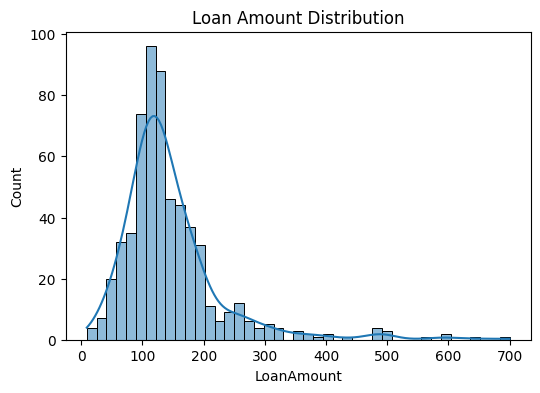

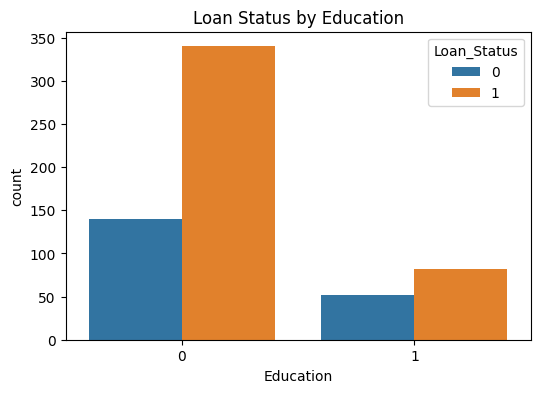

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# ✅ Step 1: Load dataset
df = pd.read_csv('/content/drive/MyDrive/train.csv')  # Update path if needed

# ✅ Step 2: Fix '3+' in Dependents if it's present
if 'Dependents' in df.columns:
    df['Dependents'] = df['Dependents'].replace('3+', '3')
    df['Dependents'] = df['Dependents'].astype(str)

# ✅ Step 3: Label Encoding
le = LabelEncoder()
for col in ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status', 'Dependents']:
    if col in df.columns:
        df[col] = le.fit_transform(df[col].astype(str))

print("🔎 Encoded Data Preview:")
print(df.head())

# ✅ Step 4: Visualization (EDA)
df_viz = df.copy()

plt.figure(figsize=(6, 4))
sns.histplot(df_viz['LoanAmount'], kde=True)
plt.title("Loan Amount Distribution")
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='Education', hue='Loan_Status', data=df_viz)
plt.title("Loan Status by Education")
plt.show()

# ✅ Step 5: Drop unneeded columns before model training
df.drop(['LoanAmount', 'ApplicantIncome', 'CoapplicantIncome', 'Loan_ID'], axis=1, inplace=True, errors='ignore')


In [ ]:
from sklearn.preprocessing import LabelEncoder

# ✅ Step 1: Fix the '3+' issue in 'Dependents'
if 'Dependents' in df.columns:
    df['Dependents'] = df['Dependents'].replace('3+', '3')
    df['Dependents'] = df['Dependents'].astype(str)
    df['Dependents'] = LabelEncoder().fit_transform(df['Dependents'])

# ✅ Step 2: Define features and target (safely drop Loan_ID)
X = df.drop(['Loan_Status', 'Loan_ID'], axis=1, errors='ignore')
y = df['Loan_Status']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Step 2: Impute missing values
imputer = SimpleImputer(strategy='most_frequent')
X = imputer.fit_transform(X)

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 5: Predict and output accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression model: {accuracy * 100:.2f}%")


Accuracy of Logistic Regression model: 78.86%


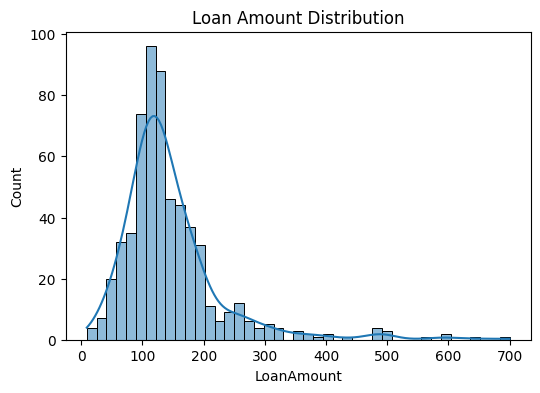

In [ ]:
# ✅ Reload original data ONLY for visualization (so that LoanAmount is available)
df_viz = pd.read_csv('/content/drive/MyDrive/train.csv')  # ← your actual path here

# ✅ Check if 'LoanAmount' exists before plotting
if 'LoanAmount' in df_viz.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_viz['LoanAmount'].dropna(), kde=True)
    plt.title("Loan Amount Distribution")
    plt.show()
else:
    print("❌ 'LoanAmount' column not found in DataFrame.")


In [ ]:
# ✅ Import the DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# ✅ Initialize the Decision Tree model
# max_depth=4 limits the depth to avoid overfitting
# random_state ensures reproducibility of results
tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)

# ✅ Train the Decision Tree model on training data
tree_model.fit(X_train, y_train)

# ✅ Predict on the test data using the trained model
y_pred_tree = tree_model.predict(X_test)

# ✅ Evaluate accuracy of the Decision Tree model
tree_accuracy = accuracy_score(y_test, y_pred_tree)
print(f"🎯 Decision Tree Accuracy: {tree_accuracy * 100:.2f}%")


🎯 Decision Tree Accuracy: 76.42%


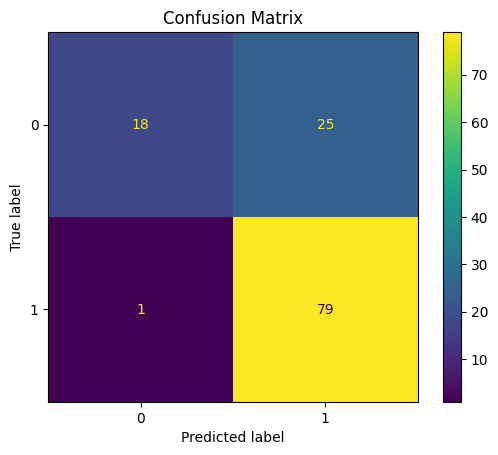

In [ ]:
# ✅ Import necessary functions to compute and display the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# ✅ Compute the confusion matrix using actual and predicted labels
cm = confusion_matrix(y_test, y_pred)

# ✅ Create a display object for the confusion matrix
# 'model.classes_' gives class labels (e.g. 0 and 1) for the display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

# ✅ Plot the confusion matrix using matplotlib
disp.plot()

# ✅ Add a title to the plot for better clarity
plt.title("Confusion Matrix")

# ✅ Show the plotted confusion matrix
plt.show()


In [ ]:
# ✅ Import the function to generate a detailed classification report
from sklearn.metrics import classification_report

# ✅ Print a title for clarity in the output
print("📊 Classification Report:")

# ✅ Generate and print the classification report
# This includes precision, recall, F1-score, and support for each class
print(classification_report(y_test, y_pred))



📊 Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
df = pd.read_csv('Churn_Modelling.csv')
df.head()


Saving Churn_Modelling.csv to Churn_Modelling (2).csv


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [9]:
# Basic structure
df.info()

# Check for missing values
df.isnull().sum()

# Check dataset shape
print("Shape of dataset:", df.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB
Shape of dataset: (10002, 14)


In [15]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)


In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male=1, Female=0


In [18]:
X = df.drop('Exited', axis=1)
y = df['Exited']


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [20]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[1535   58]
 [ 209  199]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1593
           1       0.77      0.49      0.60       408

    accuracy                           0.87      2001
   macro avg       0.83      0.73      0.76      2001
weighted avg       0.86      0.87      0.85      2001



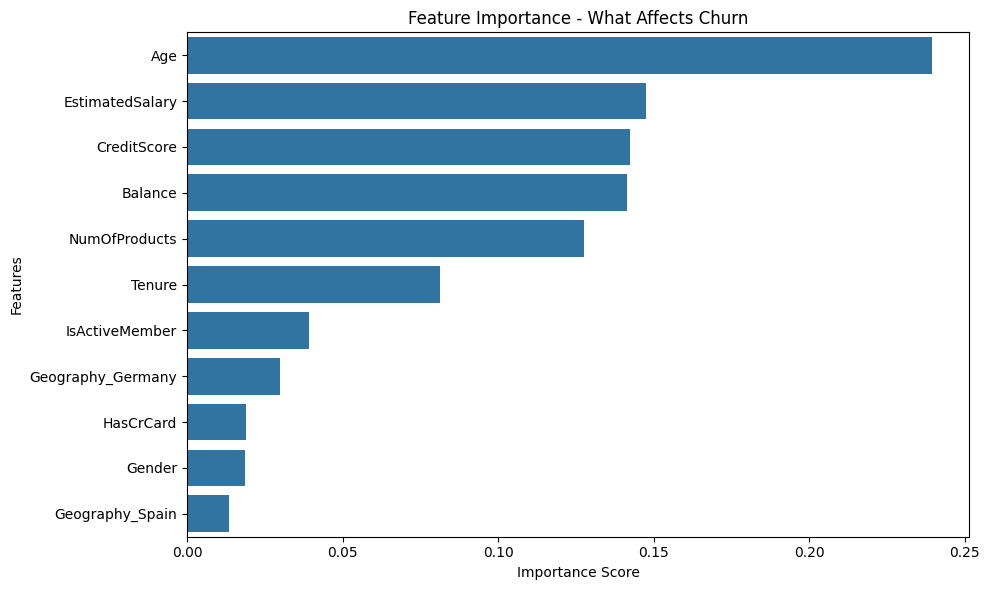

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importance = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance.sort_values(ascending=False),
            y=feature_importance.sort_values(ascending=False).index)
plt.title("Feature Importance - What Affects Churn")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()
